In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns',30)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleaning

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# in the column 'TotalCharges' showing the object but values are float

data['TotalCharges'].dtype

dtype('O')

In [9]:
data['TotalCharges'].apply(type).value_counts()

<class 'str'>    7043
Name: TotalCharges, dtype: int64

In [10]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [11]:
data['TotalCharges'].isnull().sum()

11

In [12]:
data.dropna(inplace = True)

In [13]:
# remove the column which are not needed

data = data.drop(columns='customerID')

### EDA

In [14]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Male      3549
Female    3483
Name: gender, dtype: int64


<AxesSubplot:>

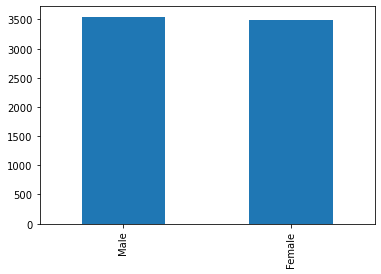

In [15]:
print(data['gender'].value_counts())
data['gender'].value_counts().plot(kind='bar')


# in the data there are almost same male and female ratio ...

No     5163
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:ylabel='Churn'>

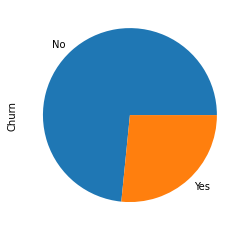

In [16]:
print(data['Churn'].value_counts())
data['Churn'].value_counts().plot(kind='pie')

# with this we can see that most of the costumer have not left they are still with the company ...

In [17]:
#from pandas_profiling import ProfileReport

In [18]:
#report = ProfileReport(data)

In [19]:
#report.to_file('churn_report.html')

<AxesSubplot:>

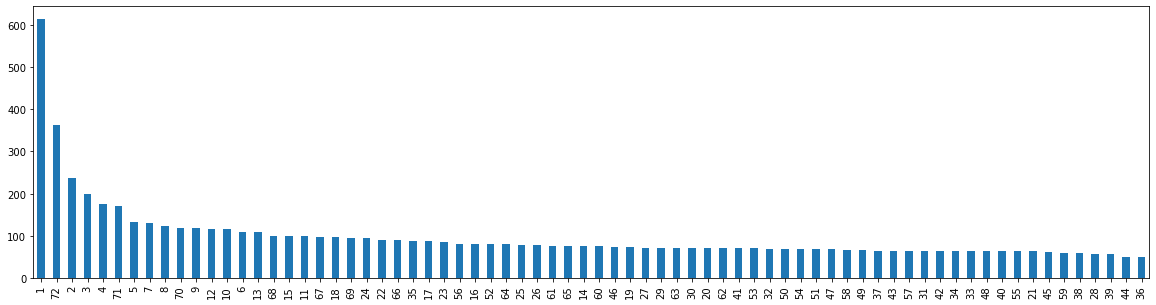

In [20]:
plt.figure(figsize=(20,5))
data['tenure'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

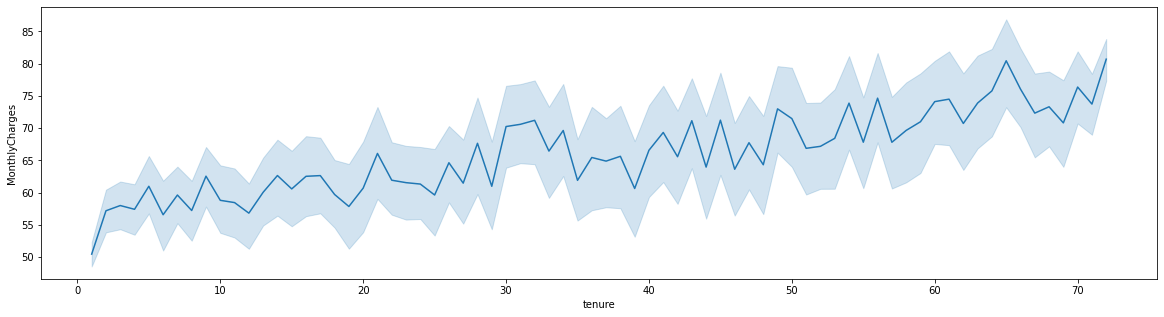

In [21]:
plt.figure(figsize=(20,5))
sns.lineplot(data=data, x=data['tenure'], y=data['MonthlyCharges'])

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


<AxesSubplot:>

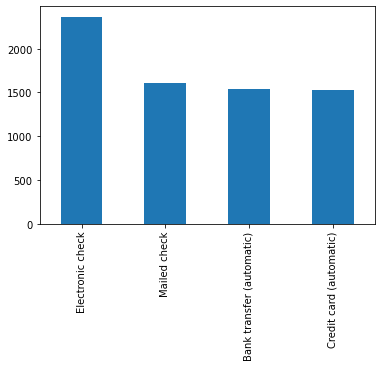

In [22]:
print(data['PaymentMethod'].value_counts())
data['PaymentMethod'].value_counts().plot(kind='bar')

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


<AxesSubplot:>

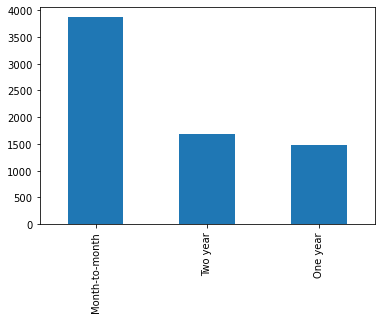

In [23]:
print(data['Contract'].value_counts())
data['Contract'].value_counts().plot(kind='bar')

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


<AxesSubplot:>

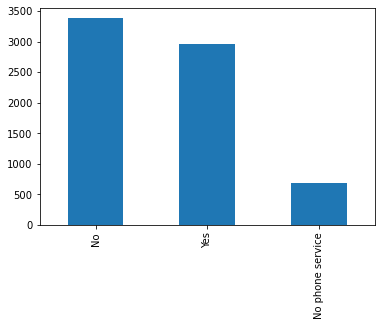

In [24]:
print(data['MultipleLines'].value_counts())
data['MultipleLines'].value_counts().plot(kind='bar')

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


<AxesSubplot:>

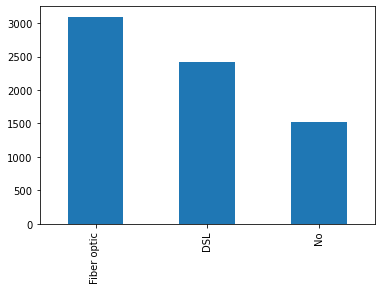

In [25]:
print(data['InternetService'].value_counts())
data['InternetService'].value_counts().plot(kind='bar')

### Encoding

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [27]:
data.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4525,Male,0,No,No,32,Yes,No,Fiber optic,Yes,Yes,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),93.40,2979.30,No
3679,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.10,20.10,Yes
513,Female,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),105.45,5916.95,No
5970,Male,0,Yes,No,5,Yes,Yes,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,89.15,413.25,No
704,Male,0,No,No,4,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Mailed check,49.25,208.45,No


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [29]:
data['gender'] = le.fit_transform(data['gender'])
data['Partner'] = le.fit_transform(data['Partner'])
data['Dependents'] = le.fit_transform(data['Dependents'])
data['PhoneService'] = le.fit_transform(data['PhoneService'])
data['MultipleLines'] = le.fit_transform(data['MultipleLines'])
data['InternetService'] = le.fit_transform(data['InternetService'])
data['OnlineSecurity'] = le.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = le.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = le.fit_transform(data['DeviceProtection'])
data['TechSupport'] = le.fit_transform(data['TechSupport'])
data['StreamingTV'] = le.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = le.fit_transform(data['StreamingMovies'])
data['PaperlessBilling'] = le.fit_transform(data['PaperlessBilling'])
data['Contract'] = le.fit_transform(data['Contract'])
data['PaymentMethod'] = le.fit_transform(data['PaymentMethod'])

data['Churn'] = le.fit_transform(data['Churn'])


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  


In [31]:
X = data.iloc[:,:-1]
y = data['Churn']

In [32]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.15, random_state=10)

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [34]:
lr.fit(Xtrain, ytrain)

D:\Bootcamp\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
ypred = lr.predict(Xtest)

In [36]:
ypred

array([0, 0, 0, ..., 1, 0, 0])

In [37]:
ytest

5401    0
1681    0
2076    0
3359    0
6629    0
       ..
6993    1
1673    1
3778    0
1819    0
3670    0
Name: Churn, Length: 1055, dtype: int32

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [39]:
accuracy_score(ytest, ypred)

0.8227488151658767

In [40]:
precision_score(ytest, ypred)

0.6704980842911877

In [41]:
recall_score(ytest, ypred)

0.6340579710144928

In [42]:
f1_score(ytest, ypred)

0.6517690875232774

In [43]:
confusion_matrix(ytest, ypred)

array([[693,  86],
       [101, 175]], dtype=int64)